# Graphs of Ayaka's EmoTensorGen Emo States

v0.0.1-EmoTensor Sliced Contextualized

Plotting Joy
	Intensity:
	max: 0.800, min: 0.150, mean: 0.628, median: 0.650, std: 0.116
	Valence:
	max: 1.000, min: 0.500, mean: 0.855, median: 0.900, std: 0.093
	Arousal:
	max: 0.800, min: 0.300, mean: 0.665, median: 0.700, std: 0.105



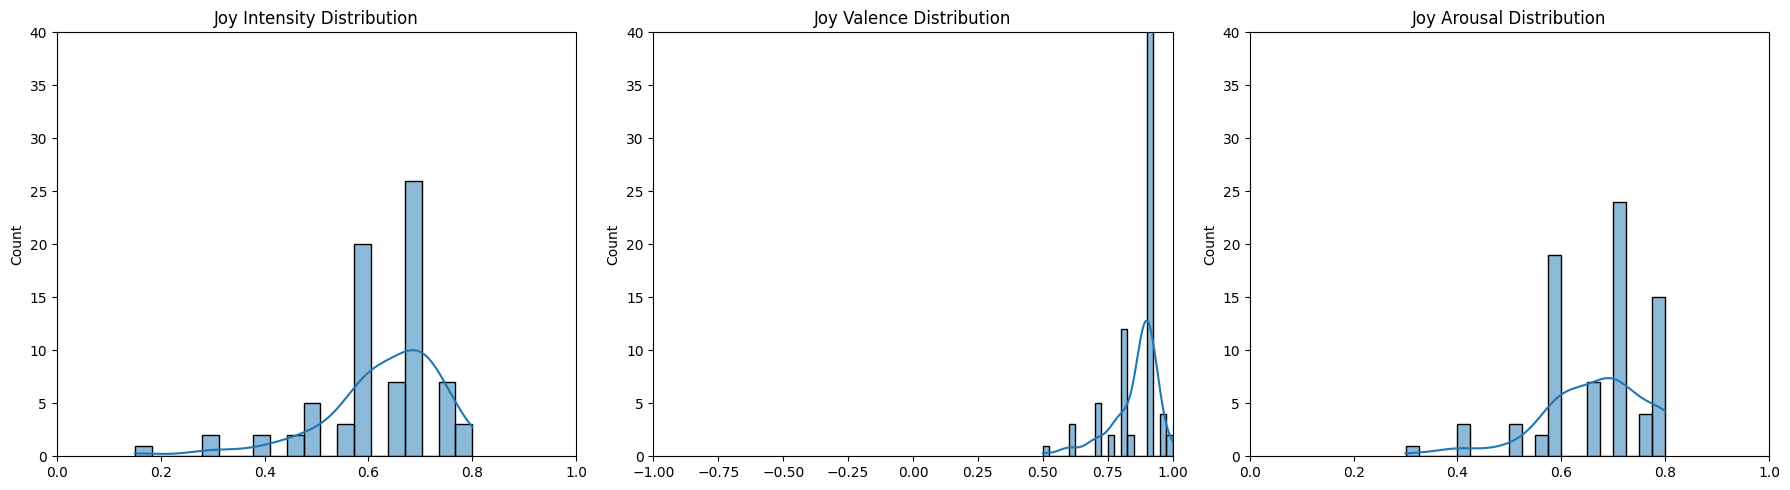

Plotting Trust
	Intensity:
	max: 0.700, min: 0.300, mean: 0.571, median: 0.550, std: 0.065
	Valence:
	max: 0.900, min: 0.600, mean: 0.795, median: 0.800, std: 0.074
	Arousal:
	max: 0.600, min: 0.400, mean: 0.526, median: 0.500, std: 0.047



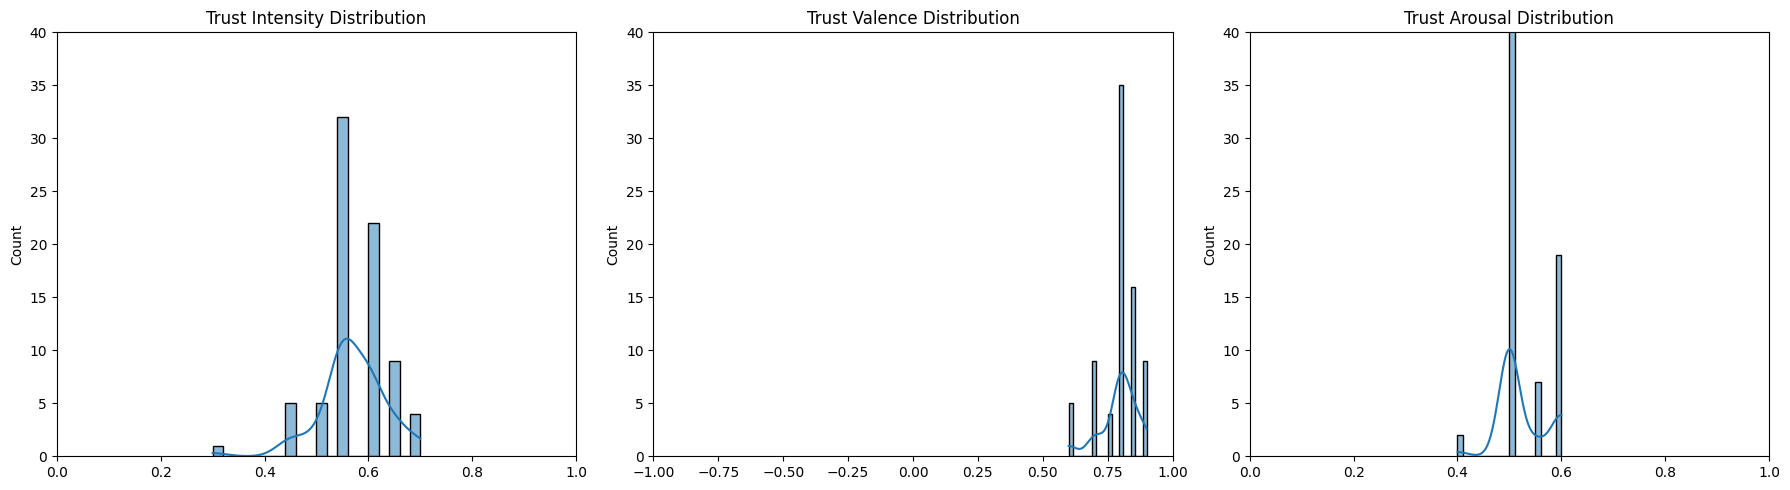

Plotting Fear
	Intensity:
	max: 0.350, min: 0.000, mean: 0.108, median: 0.100, std: 0.084
	Valence:
	max: -0.200, min: -1.000, mean: -0.517, median: -0.400, std: 0.302
	Arousal:
	max: 0.500, min: 0.000, mean: 0.284, median: 0.400, std: 0.184



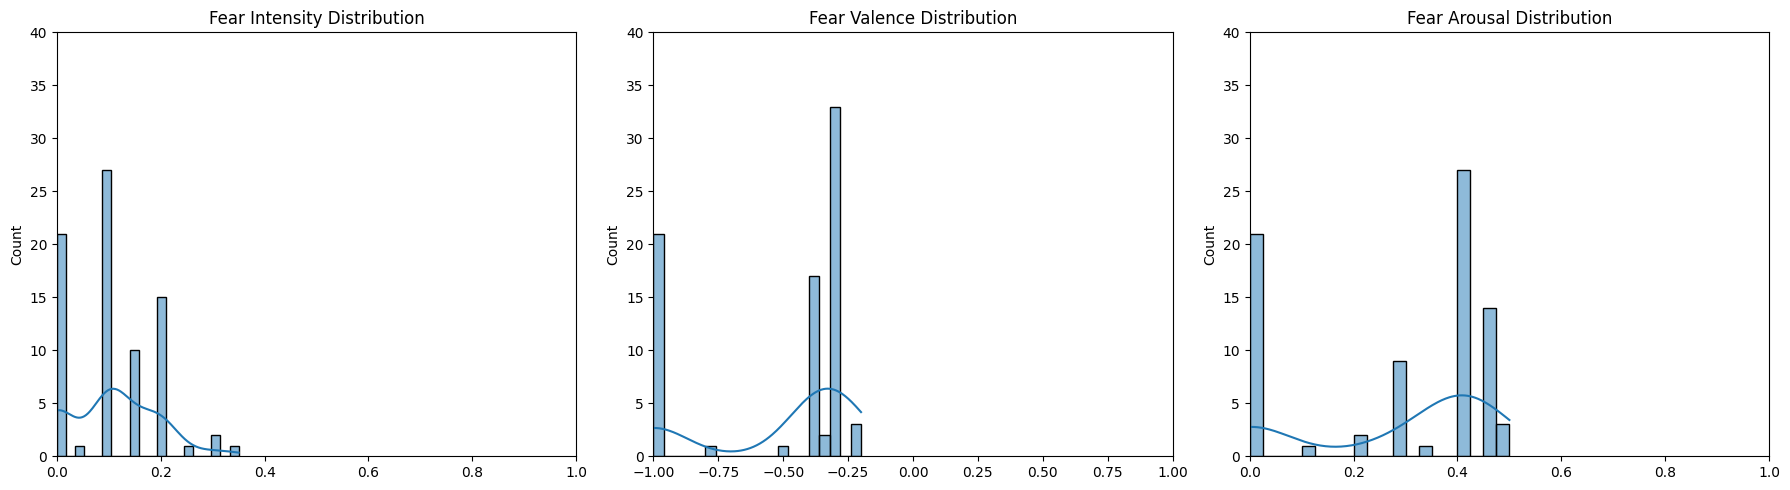

Plotting Surprise
	Intensity:
	max: 0.550, min: 0.050, mean: 0.215, median: 0.200, std: 0.112
	Valence:
	max: 0.800, min: 0.000, mean: 0.335, median: 0.300, std: 0.185
	Arousal:
	max: 0.600, min: 0.100, mean: 0.388, median: 0.400, std: 0.112



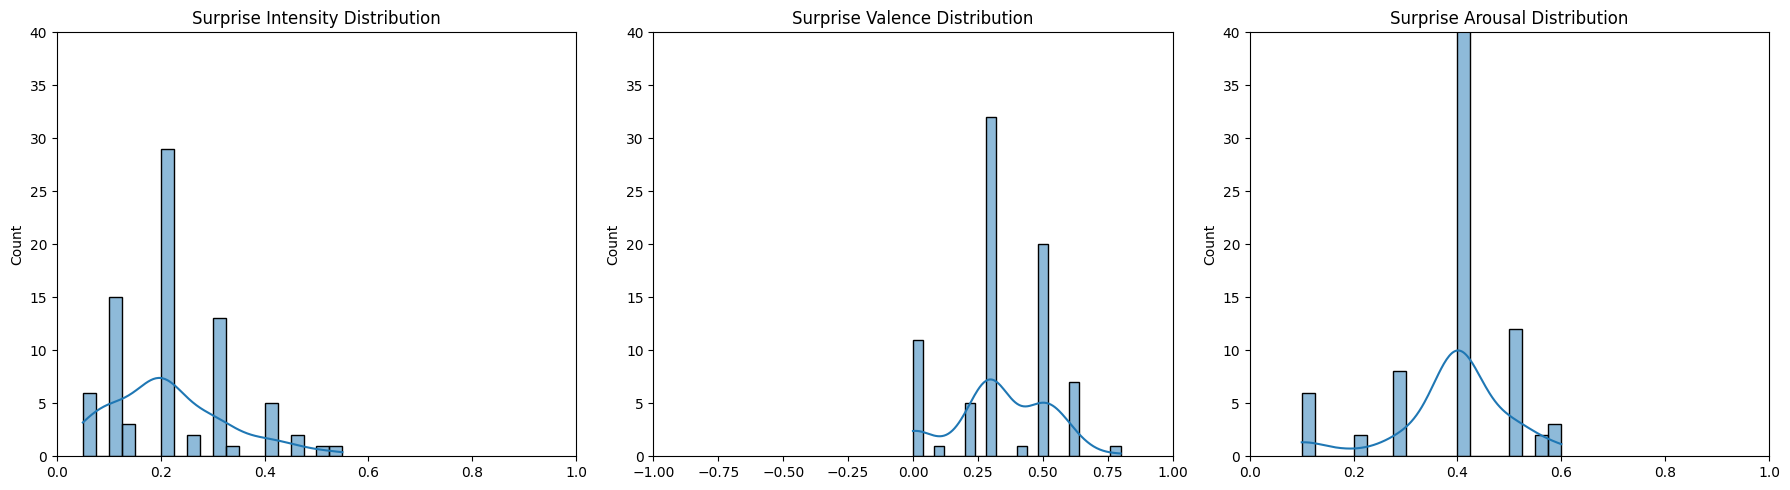

Plotting Sadness
	Intensity:
	max: 0.350, min: 0.000, mean: 0.079, median: 0.100, std: 0.073
	Valence:
	max: 1.000, min: -1.000, mean: -0.456, median: -0.300, std: 0.385
	Arousal:
	max: 0.800, min: 0.000, mean: 0.160, median: 0.200, std: 0.139



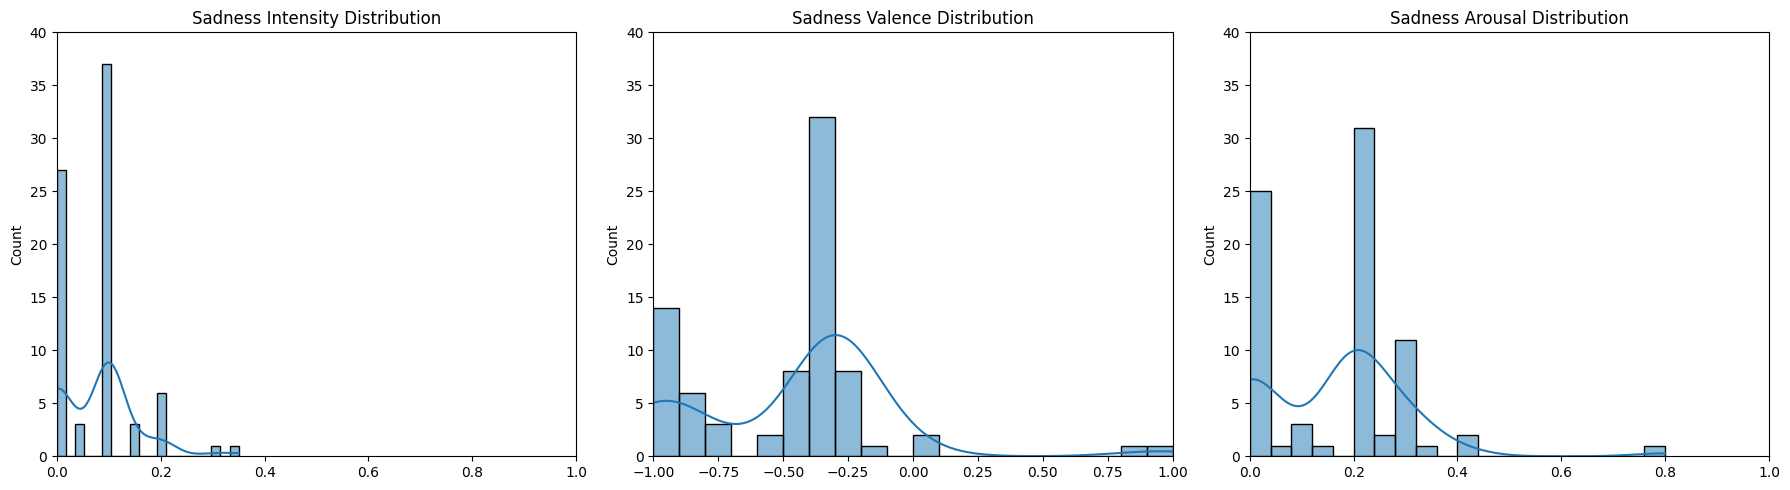

Plotting Disgust
	Intensity:
	max: 0.250, min: 0.000, mean: 0.012, median: 0.000, std: 0.036
	Valence:
	max: 1.000, min: -1.000, mean: -0.811, median: -1.000, std: 0.381
	Arousal:
	max: 0.800, min: 0.000, mean: 0.052, median: 0.000, std: 0.142



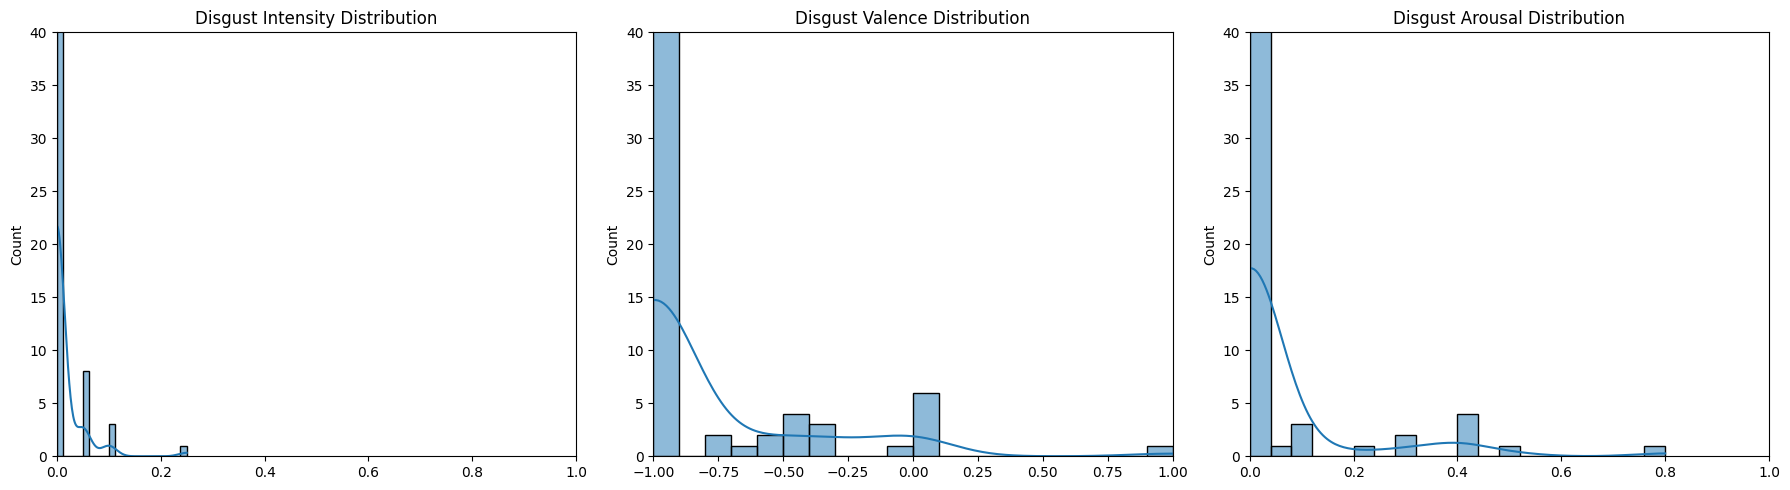

Plotting Anger
	Intensity:
	max: 0.100, min: 0.000, mean: 0.003, median: 0.000, std: 0.015
	Valence:
	max: 0.000, min: -1.000, mean: -0.929, median: -1.000, std: 0.239
	Arousal:
	max: 0.300, min: 0.000, mean: 0.011, median: 0.000, std: 0.047



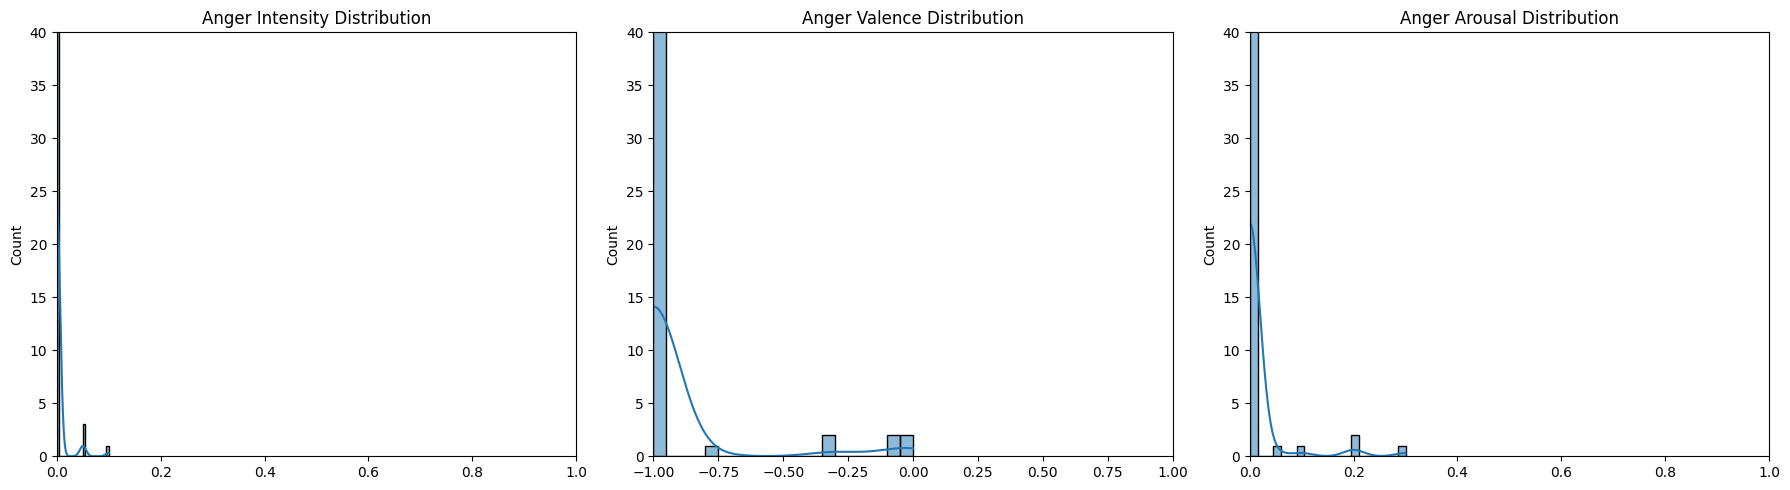

Plotting Anticipation
	Intensity:
	max: 0.750, min: 0.300, mean: 0.610, median: 0.600, std: 0.076
	Valence:
	max: 0.850, min: 0.200, mean: 0.683, median: 0.700, std: 0.136
	Arousal:
	max: 0.800, min: 0.400, mean: 0.641, median: 0.675, std: 0.097



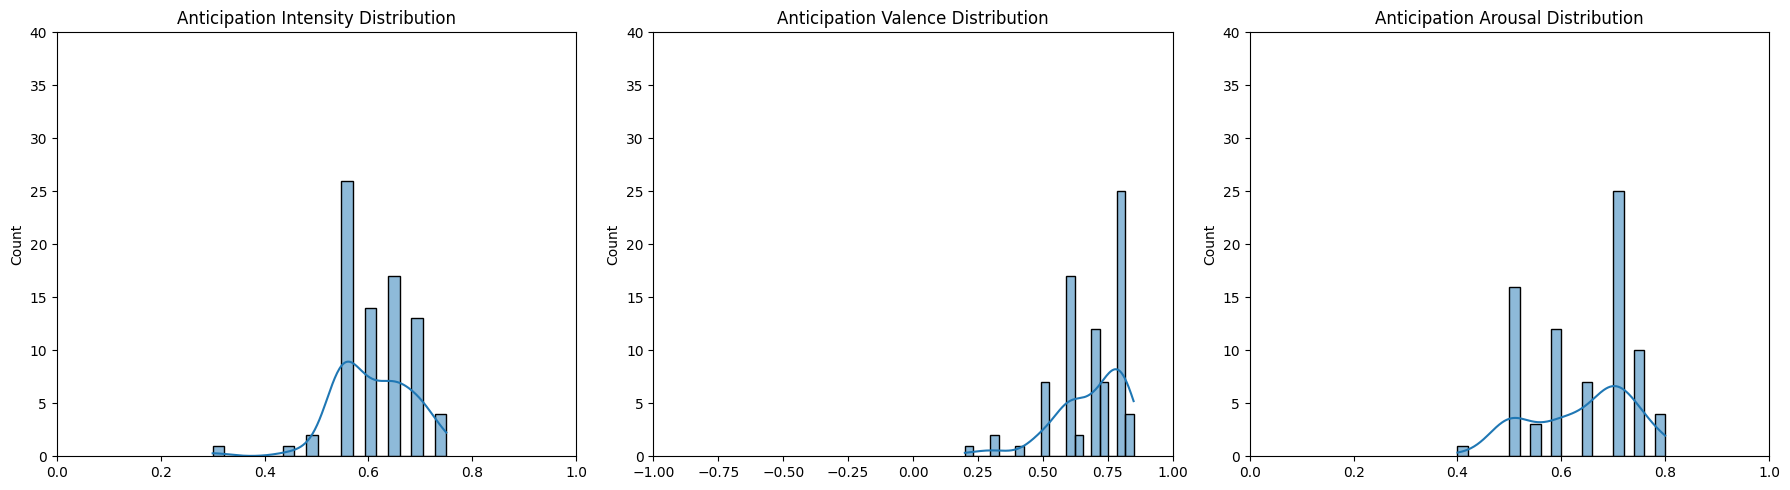

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import ast
import sys
import os

from ayaka_utils.Classes.EmoTensorModels import EmoTensorFull_CTXD
from ayaka_utils.Defs.DbxConnector import DbxFIO
from ayaka_utils.Defs.pprint import pprint

# Load the EmoTensorGen data from project root
EmoTensorFull = EmoTensorFull_CTXD.model_validate(DbxFIO(DbxPath="/EmoTensor/data/Sliced-Contextualized/EmoTensor-0-0.etsc", mode="read", type="json"))

pprint(f"Loaded EmoTensor file, version: {EmoTensorFull.version}")

# with open(EmoTensorFile) as f:
#     json_data_in = f.read()
# EmoTensorFull = EmoTensorFull_CTXD.model_validate_json(json_data_in)

Emotions = [
    {"name": "Joy", "intensity": [], "valence": [], "arousal": []},
    {"name": "Trust", "intensity": [], "valence": [], "arousal": []},
    {"name": "Fear", "intensity": [], "valence": [], "arousal": []},
    {"name": "Surprise", "intensity": [], "valence": [], "arousal": []},
    {"name": "Sadness", "intensity": [], "valence": [], "arousal": []},
    {"name": "Disgust", "intensity": [], "valence": [], "arousal": []},
    {"name": "Anger", "intensity": [], "valence": [], "arousal": []},
    {"name": "Anticipation", "intensity": [], "valence": [], "arousal": []}
]

# Loop through each transient in the EmoTensorFull object
for transient in EmoTensorFull.transients:
    # Then loop through each emotion in the Emotions list
    for ThisEmotion in Emotions:
        # Then loop through each emotion in the transient
        for TensorEmotion in transient.emoters[0].targets[0].emotions:
            # If the emotion in the Emotions list matches the emotion in the transient
            if TensorEmotion.emotion == ThisEmotion['name']:
                # Append the intensity, valence, and arousal to the Emotions list
                ThisEmotion['intensity'].append(TensorEmotion.intensity)
                ThisEmotion['valence'].append(TensorEmotion.valence)
                ThisEmotion['arousal'].append(TensorEmotion.arousal)

for Emotion in Emotions:
    # Give the statistical summary
    print(
        "=" * 80 + 
        f"\nPlotting {Emotion['name']}\n"
        "\tIntensity:\n"
        f"\tmax: {max(Emotion['intensity']):.3f}, min: {min(Emotion['intensity']):.3f}, mean: {np.mean(Emotion['intensity']):.3f}, median: {np.median(Emotion['intensity']):.3f}, std: {np.std(Emotion['intensity']):.3f}\n"
        "\tValence:\n"
        f"\tmax: {max(Emotion['valence']):.3f}, min: {min(Emotion['valence']):.3f}, mean: {np.mean(Emotion['valence']):.3f}, median: {np.median(Emotion['valence']):.3f}, std: {np.std(Emotion['valence']):.3f}\n"
        "\tArousal:\n"
        f"\tmax: {max(Emotion['arousal']):.3f}, min: {min(Emotion['arousal']):.3f}, mean: {np.mean(Emotion['arousal']):.3f}, median: {np.median(Emotion['arousal']):.3f}, std: {np.std(Emotion['arousal']):.3f}\n"
        )

    # Print the plots for each emotion in the tensor:
    # Create a figure with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Intensity distribution plot
    sns.histplot(Emotion['intensity'], bins=20, kde=True, ax=axes[0])
    axes[0].set(title=f'{Emotion["name"]} Intensity Distribution',
                xlim=(0, 1), ylim=(0, 40))
    
    # Valence distribution plot
    sns.histplot(Emotion['valence'], bins=20, kde=True, ax=axes[1])
    axes[1].set(title=f'{Emotion["name"]} Valence Distribution',
                xlim=(-1, 1), ylim=(0, 40))
    
    # Arousal distribution plot
    sns.histplot(Emotion['arousal'], bins=20, kde=True, ax=axes[2])
    axes[2].set(title=f'{Emotion["name"]} Arousal Distribution',
                xlim=(0, 1), ylim=(0, 40))
    
    plt.tight_layout()
    plt.show()